Best degree: 3
Best Model Performance:
R² Score: 0.993
RMSE: 0.438
MAE: 0.330
Future weather predictions saved to 'future_weather_predictions_2024.csv'


c:\Users\natra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


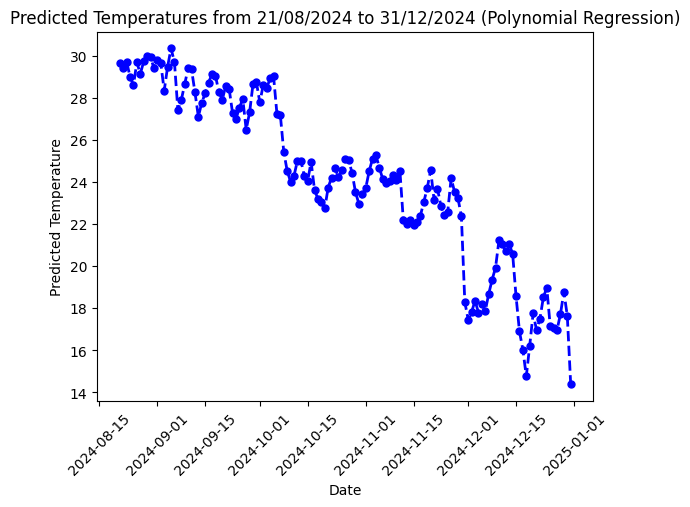

Best Polynomial Model Degree: 3


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '../../../dataset/data.csv'  # Adjust the path to your dataset
data = pd.read_csv(file_path)

# Prepare the data for Polynomial Regression
data['ds'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y')

# Add 'day_of_year' to capture the seasonality
data['day_of_year'] = data['ds'].dt.dayofyear

# Features (tempmax and tempmin) and target (temp)
X = data[['tempmax', 'tempmin']]  # Features
y = data['temp']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Create a pipeline that includes PolynomialFeatures and LinearRegression
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Step 2: Define the hyperparameters (degree of the polynomial) to tune
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5]  # Degrees from 1 (linear) to 5
}

# Step 3: Use GridSearchCV to find the best degree for the Polynomial Regression model
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Step 4: Get the best model and the best hyperparameters
best_model = grid_search.best_estimator_
best_degree = grid_search.best_params_['polynomialfeatures__degree']
print(f"Best degree: {best_degree}")

# Step 5: Predict on the test set and evaluate performance
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Step 6: Generate future dates from 21/08/2024 to 31/12/2024
future_dates = pd.date_range(start='2024-08-21', end='2024-12-31', freq='D')

# Calculate the average tempmax and tempmin for each day of the year (historical data)
daily_avg = data.groupby(data['day_of_year'])[['tempmax', 'tempmin']].mean().reset_index()

# Extract the day of year for future dates
future_day_of_year = future_dates.day_of_year

# Assign tempmax and tempmin based on historical averages for that day of the year
future_features = pd.DataFrame({
    'tempmax': [daily_avg.loc[daily_avg['day_of_year'] == day, 'tempmax'].values[0] for day in future_day_of_year],
    'tempmin': [daily_avg.loc[daily_avg['day_of_year'] == day, 'tempmin'].values[0] for day in future_day_of_year]
})

# Predict the future temperatures using the best Polynomial Regression model
future_predictions = best_model.predict(future_features)

# Step 7: Create a DataFrame to store the future dates and predicted temperatures
future_results_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Temperature': future_predictions
})

# Step 8: Save the predictions to a CSV file
future_results_df.to_csv('future_weather_predictions__finetuning_2024.csv', index=False)
print("Future weather predictions saved to 'future_weather_predictions_2024.csv'")

# Plot the future predicted temperatures
plt.plot(future_dates, future_predictions, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.xlabel('Date')
plt.ylabel('Predicted Temperature')
plt.title('Predicted Temperatures from 21/08/2024 to 31/12/2024 (Polynomial Regression)')
plt.xticks(rotation=45)
plt.show()

# Display the best model's performance
print("Best Polynomial Model Degree:", best_degree)
